In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm, tnrange
%matplotlib inline

In [2]:
df = pd.read_excel("Train/train_Data.xlsx")
tdf = pd.read_excel("Test/test_Data.xlsx")
df.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months


In [3]:
df.shape, df.ID.nunique(), tdf.shape, tdf.ID.nunique(), 

((128655, 26), 128655, (14745, 25), 14745)

# train demographic data

In [4]:
cat_cols = ['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'BranchID', 'Area', 
            'ManufacturerID', 'SupplierID', 'SEX', 'City', 'State', 'ZiPCODE', 'Top-up Month']
reg_cols = ['AmountFinance', 'DisbursalAmount', 'EMI', 'AssetID', 'MonthlyIncome', 'Tenure', 'AssetCost', 'LTV', 'AGE']
date_cols = ['DisbursalDate', 'MaturityDAte', 'AuthDate']
len(cat_cols) + len(reg_cols) + len(date_cols)

25

In [5]:
df.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64

In [6]:
tdf.isnull().sum()

ID                   0
Frequency            0
InstlmentMode        0
LoanStatus           0
PaymentMode          0
BranchID             0
Area               546
Tenure               0
AssetCost            0
AmountFinance        0
DisbursalAmount      0
EMI                  0
DisbursalDate        0
MaturityDAte         0
AuthDate             0
AssetID              0
ManufacturerID       2
SupplierID           0
LTV                  0
SEX                  5
AGE                  7
MonthlyIncome       14
City                 0
State                0
ZiPCODE              1
dtype: int64

In [7]:
for col in cat_cols:
    if col in df.columns:
        print("col {} : unique {}".format(col, df[col].nunique()))
    
    if col in tdf.columns:
        print("col {} : unique {}".format(col, tdf[col].nunique()))
    print("----------")

col Frequency : unique 4
col Frequency : unique 3
----------
col InstlmentMode : unique 2
col InstlmentMode : unique 2
----------
col LoanStatus : unique 2
col LoanStatus : unique 2
----------
col PaymentMode : unique 11
col PaymentMode : unique 10
----------
col BranchID : unique 189
col BranchID : unique 182
----------
col Area : unique 92
col Area : unique 80
----------
col ManufacturerID : unique 10
col ManufacturerID : unique 12
----------
col SupplierID : unique 4539
col SupplierID : unique 1573
----------
col SEX : unique 2
col SEX : unique 2
----------
col City : unique 488
col City : unique 321
----------
col State : unique 22
col State : unique 18
----------
col ZiPCODE : unique 9123
col ZiPCODE : unique 2182
----------
col Top-up Month : unique 7
----------


In [8]:
for col in reg_cols:
    if col in df.columns:
        print("col {} : unique {}".format(col, df[col].nunique()))
    
    if col in tdf.columns:
        print("col {} : unique {}".format(col, tdf[col].nunique()))
    print("----------")

col AmountFinance : unique 20439
col AmountFinance : unique 4066
----------
col DisbursalAmount : unique 19412
col DisbursalAmount : unique 3978
----------
col EMI : unique 24323
col EMI : unique 4370
----------
col AssetID : unique 128655
col AssetID : unique 14745
----------
col MonthlyIncome : unique 11568
col MonthlyIncome : unique 2470
----------
col Tenure : unique 141
col Tenure : unique 98
----------
col AssetCost : unique 7835
col AssetCost : unique 1162
----------
col LTV : unique 7988
col LTV : unique 5101
----------
col AGE : unique 73
col AGE : unique 65
----------


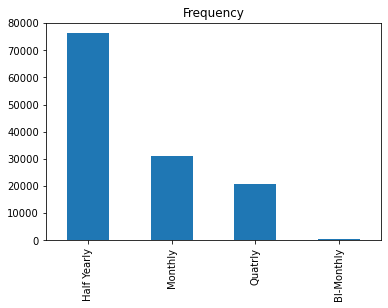

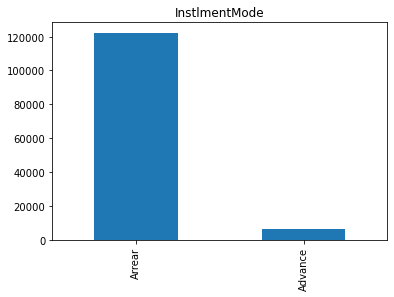

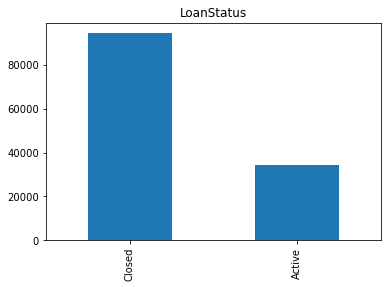

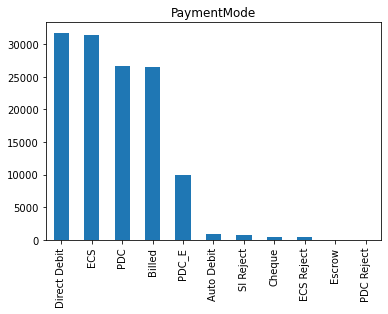

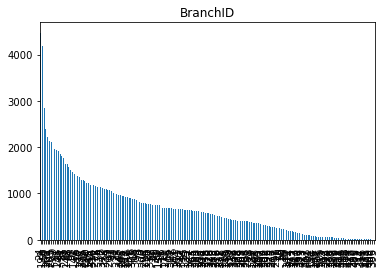

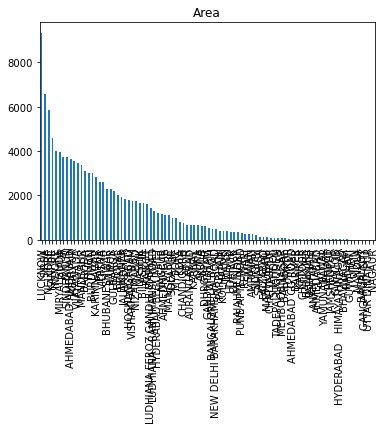

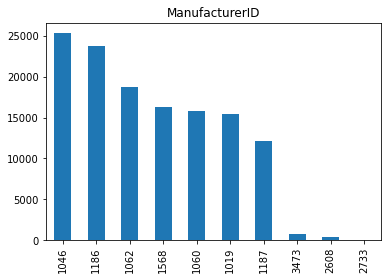

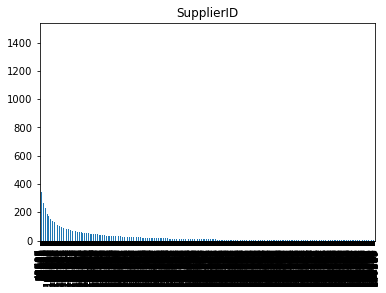

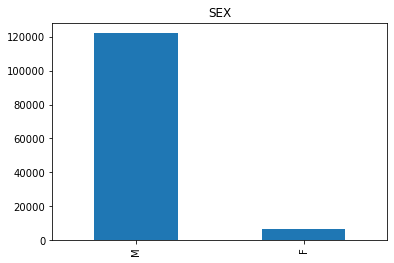

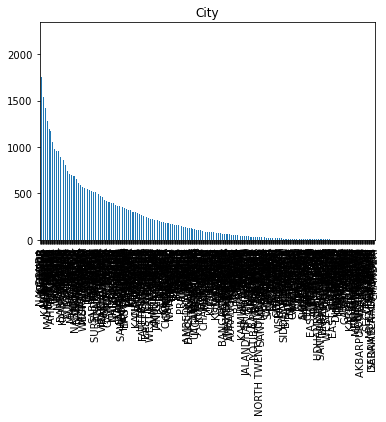

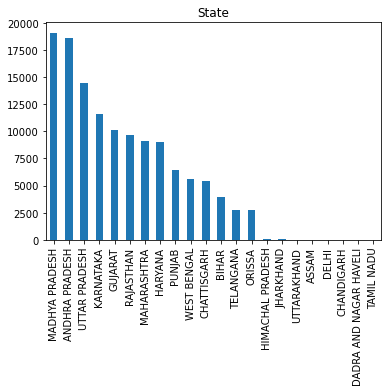

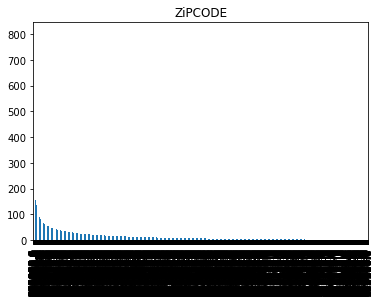

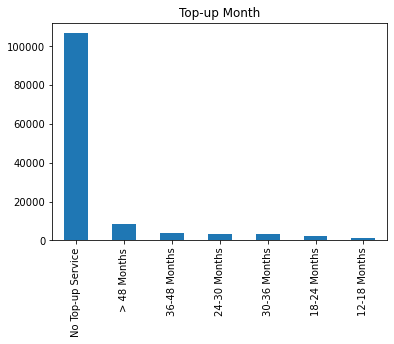

In [9]:
for col in cat_cols:
    if col in df.columns:
        fig, ax = plt.subplots()
        df[col].value_counts().plot(ax=ax, kind='bar', title=col)

    

In [10]:
df.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64

# fix missing city

In [11]:

# check if all values are either nan or whole numbers
    
x_int1 = df.ZiPCODE[~df.ZiPCODE.isnull()].values.astype(int)
x_int2 = tdf.ZiPCODE[~tdf.ZiPCODE.isnull()].values.astype(int)

np.all((df.ZiPCODE[~df.ZiPCODE.isnull()] - x_int1) == 0), np.all((tdf.ZiPCODE[~tdf.ZiPCODE.isnull()] - x_int2) == 0)

(True, True)

In [12]:
# check if a zip code can be mapped to different area

both_area_pin_missing = 0
both_city_pin_missing = 0
both_area_city_missing = 0
all_three_missing = 0

for area, pin, city in zip(df.Area.values, df.ZiPCODE.values, df.City.values):
    # there is no place where both pin and area are missing
    x = np.isnan(pin)
    y = pd.isnull(area)
    z = pd.isnull(city)
    if x and y: both_area_pin_missing += 1
    if y and z: both_area_city_missing += 1
    if x and z: both_city_pin_missing += 1
    if x and y and z: all_three_missing += 1
both_area_pin_missing, both_area_city_missing, both_city_pin_missing, all_three_missing

(48, 1505, 344, 47)

In [13]:
# check if a zip code can be mapped to different area

both_area_pin_missing = 0
both_city_pin_missing = 0
both_area_city_missing = 0
all_three_missing = 0

for area, pin, city in zip(tdf.Area.values, tdf.ZiPCODE.values, tdf.City.values):
    # there is no place where both pin and area are missing
    x = np.isnan(pin)
    y = pd.isnull(area)
    z = pd.isnull(city)
    if x and y: both_area_pin_missing += 1
    if y and z: both_area_city_missing += 1
    if x and z: both_city_pin_missing += 1
    if x and y and z: all_three_missing += 1
both_area_pin_missing, both_area_city_missing, both_city_pin_missing, all_three_missing

(0, 0, 0, 0)

In [14]:
# can a pin be mapped to several cities
pin_city_mapping = {}
for city, pin in zip(df.City.values, df.ZiPCODE.values):
    if not (np.isnan(pin) or pd.isnull(city)):
        if pin in pin_city_mapping:
            pin_city_mapping[pin].add(city)
        else:
            pin_city_mapping[pin] = set([city])
for pin in pin_city_mapping:
    x = pin_city_mapping[pin]
    if len(x) > 1:
        print("{}: {}".format(pin, x))

713101.0: {'BURDWAN', 'BIRBHUM'}
722138.0: {'KOLKATA', 'BANKURA'}
741137.0: {'KOLKATA', 'NADIA'}
145001.0: {'JALANDHAR (PATHANKOT)', 'PATHANKOT'}
145025.0: {'GURDASPUR', 'PATHANKOT'}
584123.0: {'RAICHUR', 'MANVI'}
142043.0: {'FIROZPUR', 'MOGA'}
141801.0: {'LUDHIANA', 'FATEHGARH SAHIB'}
733140.0: {'DAKSHIN DINAJPUR', 'KOLKATA'}
160055.0: {'RUPNAGAR', 'MOHALI'}
125113.0: {'FATEHABAD', 'HISAR'}
125052.0: {'FATEHABAD', 'HISAR'}
741155.0: {'KOLKATA', 'NADIA'}
742101.0: {'MURSHIDABAD', 'BAHARAMPUR'}
134202.0: {'AMBALA', 'PANCHKULA'}
140101.0: {'RUPNAGAR', 'FATEHGARH SAHIB'}
210421.0: {'HAMIRPUR', 'MAHOBA'}
229303.0: {'PRATAPGARH', 'RAI BARELI'}
229010.0: {'BARELI', 'RAI BARELI'}
577413.0: {'SHIMOGA', '506'}
577243.0: {'SHIMOGA', 'DAVANGARE'}
505532.0: {'KARIMNAGAR', '6'}
224122.0: {'AKBARPUR NEAR KANPUR', 'AMBEDKAR NAGAR'}
389235.0: {'VADODARA', 'PANCH MAHALS'}
431522.0: {'LATUR', 'OSMANABAD'}
441207.0: {'GADCHIROLI', 'CHANDRAPUR'}
442302.0: {'WARDHA', 'AMRAVATI'}
414603.0: {'Newasa', 'AHMED

In [15]:
df[df.City == 'JALANDHAR (PATHANKOT)'].shape, df[df.City == 'JALANDHAR'].shape,  df[df.City == 'PATHANKOT'].shape

((37, 26), (316, 26), (4, 26))

In [16]:
city_mappings = {
    "AURANGABAD(BH)": "AURANGABAD",
    '6': 'KARIMNAGAR',
    '506': 'SHIMOGA',
    '1947': 'VAISHALI'
}
pin_city_mappings = {}

In [17]:
# check how many cities have numbers in them
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)
for city, pin in zip(df.City.values, df.ZiPCODE.values):
    if not pd.isnull(city):
        if hasNumbers(city):
            print(city, pin)

506 577413.0
506 577413.0
506 577413.0
506 577413.0
506 577413.0
6 505532.0
6 505532.0
6 505532.0
6 505532.0
6 505532.0
6 505532.0
1947 844111.0
1947 844111.0
1947 844111.0
1947 844111.0
1947 844111.0
1947 844111.0
1947 844111.0
1947 844111.0


In [18]:
# fixing numbers and aurangabad
df['City'] = df['City'].apply(lambda x: city_mappings[x] if x in city_mappings else x)

In [19]:
# creating area => city, pin => area, pin => city
area_city = {}
pin_area = {}
pin_city = {}
city_area = {}
area_pin = {}
city_pin = {}
for area, pin, city in zip(df.Area.values, df.ZiPCODE.values, df.City.values):
    x = np.isnan(pin)
    y = pd.isnull(area)
    z = pd.isnull(city)
    
    if not (x or y): 
        if pin not in pin_area: pin_area[pin] = set()
        pin_area[pin].add(area)
        if area not in area_pin: area_pin[area] = set()
        area_pin[area].add(pin)
        
    if not (x or z):
        if pin not in pin_city: pin_city[pin] = set()
        pin_city[pin].add(city)
        if city not in city_pin: city_pin[city] = set()
        city_pin[city].add(pin)
    if not (y or z):
        if area not in area_city: area_city[area] = set()
        area_city[area].add(city)
        if city not in city_area: city_area[city] = set()
        city_area[city].add(area)
len(area_city), len(pin_area), len(pin_city), len(city_area)
    

(92, 8492, 8698, 466)

In [20]:
# to_solve = 11256
# solved = 0
# for area, pin, city in zip(df.Area.values, df.ZiPCODE.values, df.City.values):
#     if pd.isnull(city):
#         # first check if it can be replaced by pin_city
#         try:
#             if not np.isnan(pin) and len(pin_city[pin]) == 1:
#                 solved += 1
#         except:
#             print("pin not found {}".format(pin))
# solved

In [21]:
# solve where pin is available and city is not and that pin has only one city
def replace_city_with_pin(x):
    if pd.isnull(x[0]):
        try:
            if (not np.isnan(x[1]))  and len(pin_city[x[1]]) == 1: 
                return list(pin_city[x[1]])[0]
            else:
                return x[0]
        except:
            return x[0]
    return x[0]
df['City'] = df[['City', 'ZiPCODE']].apply(lambda x: replace_city_with_pin(x), axis=1)

In [22]:
df.City.isnull().sum()

1381

In [23]:
# solve where area is available and city is not and area has only one city
def replace_city_with_area(x):
    if pd.isnull(x[0]):
        try:
            if (not pd.isnull(x[1])) and len(area_city[x[1]]) == 1:
                return list(area_city[x[1]])[0]
            elif x[1] in area_city: return x[1]
            else: return x[0]
        except:
            return x[0]
    return x[0]
df['City'] = df[['City', 'Area']].apply(lambda x: replace_city_with_area(x), axis=1)
            

In [24]:
df.City.isnull().sum()

154

# fix Area

In [25]:
df.Area.isnull().sum()

11653

In [26]:
# solve where city is available and area is not and city has only one area
def replace_area_with_city(x):
    if pd.isnull(x[0]):
        try:
            if (not pd.isnull(x[1])) and len(city_area[x[1]]) == 1:
                return list(city_area[x[1]])[0]
#             elif x[1] in area_city: return x[1]
            else: return x[0]
        except:
            return x[0]
    return x[0]
df['Area'] = df[['Area', 'City']].apply(lambda x: replace_area_with_city(x), axis=1)
            

In [27]:
df.Area.isnull().sum()

7545

In [28]:
# solve where pin is available and area is not and that pin has only one area
def replace_area_with_pin(x):
    if pd.isnull(x[0]):
        try:
            if (not np.isnan(x[1]))  and len(pin_area[x[1]]) == 1: 
                return list(pin_area[x[1]])[0]
            else:
                return x[0]
        except:
            return x[0]
    return x[0]
df['Area'] = df[['Area', 'ZiPCODE']].apply(lambda x: replace_area_with_pin(x), axis=1)

In [29]:
df.Area.isnull().sum()

4242

In [30]:
# creating area => city, pin => area, pin => city
test_pin_area = {}
test_city_area = {}
for area, pin, city in zip(tdf.Area.values, tdf.ZiPCODE.values, tdf.City.values):
    x = np.isnan(pin)
    y = pd.isnull(area)
    z = pd.isnull(city)
    
    if not (x or y): 
        if pin not in test_pin_area: test_pin_area[pin] = set()
        test_pin_area[pin].add(area)
#     if not (x or z):
#         if pin not in pin_city: pin_city[pin] = set()
#         pin_city[pin].add(city)
    
    if not (y or z):
        if city not in test_city_area: test_city_area[city] = set()
        test_city_area[city].add(area)

        
    

In [31]:
print(tdf.Area.isnull().sum())
def test_replace_area_with_city(x):
    if pd.isnull(x[0]):
        try:
            if (not pd.isnull(x[1])) and len(test_city_area[x[1]]) == 1:
                return list(test_city_area[x[1]])[0]
#             elif x[1] in area_city: return x[1]
            else: return x[0]
        except:
            return x[0]
    return x[0]
tdf['Area'] = tdf[['Area', 'City']].apply(lambda x: test_replace_area_with_city(x), axis=1)
print(tdf.Area.isnull().sum())

def test_replace_area_with_pin(x):
    if pd.isnull(x[0]):
        try:
            if (not np.isnan(x[1]))  and len(test_pin_area[x[1]]) == 1: 
                return list(test_pin_area[x[1]])[0]
            else:
                return x[0]
        except:
            return x[0]
    return x[0]

tdf['Area'] = tdf[['Area', 'ZiPCODE']].apply(lambda x: test_replace_area_with_pin(x), axis=1)
print(tdf.Area.isnull().sum())

546
395
346


# pin update

In [32]:
print(df.ZiPCODE.isnull().sum())
def replace_pin(x):
    pin, area, city = x[0], x[1], x[2]
    if np.isnan(pin):
        if (not pd.isnull(area)) and len(area_pin[area]) == 1:
            return list(area_pin[area])[0]
        elif (not pd.isnull(city) and len(city_pin[city]) == 1):
            return list(city_pin[city])[0]
        else: return pin
    else:
        return pin

df[['ZiPCODE', 'Area', 'City']].apply(lambda x: replace_area_with_pin(x), axis=1).isnull().sum()

372


372

In [33]:
df['ZiPCODE'] = df.ZiPCODE.values.astype(int)

In [34]:
tdf['ZiPCODE'] = tdf.ZiPCODE.values.astype(int)

In [35]:
df.dtypes

ID                          int64
Frequency                  object
InstlmentMode              object
LoanStatus                 object
PaymentMode                object
BranchID                    int64
Area                       object
Tenure                      int64
AssetCost                   int64
AmountFinance             float64
DisbursalAmount           float64
EMI                       float64
DisbursalDate      datetime64[ns]
MaturityDAte       datetime64[ns]
AuthDate           datetime64[ns]
AssetID                     int64
ManufacturerID              int64
SupplierID                  int64
LTV                       float64
SEX                        object
AGE                       float64
MonthlyIncome             float64
City                       object
State                      object
ZiPCODE                     int64
Top-up Month               object
dtype: object

In [36]:
df.isnull().sum()

ID                    0
Frequency             0
InstlmentMode         0
LoanStatus            0
PaymentMode           0
BranchID              0
Area               4242
Tenure                0
AssetCost             0
AmountFinance         0
DisbursalAmount       0
EMI                   0
DisbursalDate         0
MaturityDAte          1
AuthDate              0
AssetID               0
ManufacturerID        0
SupplierID            0
LTV                   0
SEX                  59
AGE                  59
MonthlyIncome       234
City                154
State                 0
ZiPCODE               0
Top-up Month          0
dtype: int64

In [37]:
tdf.isnull().sum()

ID                   0
Frequency            0
InstlmentMode        0
LoanStatus           0
PaymentMode          0
BranchID             0
Area               346
Tenure               0
AssetCost            0
AmountFinance        0
DisbursalAmount      0
EMI                  0
DisbursalDate        0
MaturityDAte         0
AuthDate             0
AssetID              0
ManufacturerID       2
SupplierID           0
LTV                  0
SEX                  5
AGE                  7
MonthlyIncome       14
City                 0
State                0
ZiPCODE              0
dtype: int64

In [38]:
tdf.dtypes

ID                          int64
Frequency                  object
InstlmentMode              object
LoanStatus                 object
PaymentMode                object
BranchID                    int64
Area                       object
Tenure                      int64
AssetCost                   int64
AmountFinance             float64
DisbursalAmount           float64
EMI                       float64
DisbursalDate      datetime64[ns]
MaturityDAte       datetime64[ns]
AuthDate           datetime64[ns]
AssetID                     int64
ManufacturerID            float64
SupplierID                  int64
LTV                       float64
SEX                        object
AGE                       float64
MonthlyIncome             float64
City                       object
State                      object
ZiPCODE                     int64
dtype: object

In [39]:
df.to_csv("Train/cleaned_train.csv", index=False)
tdf.to_csv("Test/cleaned_train.csv", index=False)
